In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv("/content/drive/MyDrive/NLP/NLP_Cleaned_IMDB (1).csv")

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [6]:
bag_of_words

,10,10 10,10 minut,10 year,100,1000,1010,11,110,12,...,young girl,young man,young peopl,young woman,younger,youth,zero,zombi,zombi movi,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

In [8]:
pca_result.shape

(9983, 2)

<Axes: >

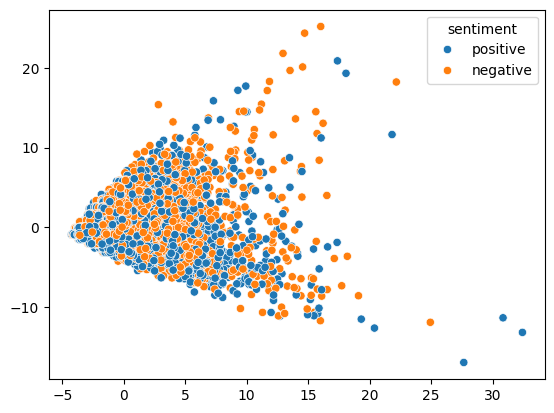

In [9]:
sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=df['sentiment'])

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# 1. Load your dataset (assuming a DataFrame 'df' with features X and target y)
# Example: df = pd.read_csv('your_data.csv')
X = bag_of_words # feature columns (using bag-of-words)
y = df['sentiment']                 # target column

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Scale features (important before PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Apply PCA
pca = PCA(n_components=0.95, whiten=False, random_state=42)
# Keep enough components to explain ~95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of PCA components: {pca.n_components_}")

# 5. Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train_pca, y_train)

# 6. Predict & evaluate
y_pred = nb.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Number of PCA components: 3258
Accuracy: 0.543314972458688
              precision    recall  f1-score   support

    negative       0.53      0.63      0.58       992
    positive       0.56      0.45      0.50      1005

    accuracy                           0.54      1997
   macro avg       0.55      0.54      0.54      1997
weighted avg       0.55      0.54      0.54      1997



In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = bag_of_words
y = df['sentiment']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: scale features (RF is robust, but scaling can help)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize & train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)  # classifier.fit(X_train, y_train) also works :contentReference[oaicite:1]{index=1}

# Predict on test data
y_pred = rf.predict(X_test_scaled)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8482724086129194
              precision    recall  f1-score   support

    negative       0.84      0.86      0.85       992
    positive       0.86      0.84      0.85      1005

    accuracy                           0.85      1997
   macro avg       0.85      0.85      0.85      1997
weighted avg       0.85      0.85      0.85      1997

Confusion Matrix:
 [[854 138]
 [165 840]]


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")

# Fit to the text and transform it into a TF-IDF matrix
X_tfidf = vectorizer.fit_transform(df["review"])

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out()
)

print(tfidf_df)

       00  000  0001  0069  007   01  010  01000  0126   02  ...  étcother  \
0     0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   
1     0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   
2     0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   
3     0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   
4     0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   
...   ...  ...   ...   ...  ...  ...  ...    ...   ...  ...  ...       ...   
9978  0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   
9979  0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   
9980  0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   
9981  0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   
9982  0.0  0.0   0.0   0.0  0.0  0.0  0.0    0.0   0.0  0.0  ...       0.0   

      êtrepeutêtr   ís  ísnt   ïn  óli  önsjön  über  überwoman

In [ ]:
y = df['sentiment']

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score





# 1. Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(df["review"])

# 2. Labels (Assume binary classification: 0 = negative, 1 = positive)
y = df["sentiment"] # Corrected: stratify on sentiment

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# 4. Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 5. Predictions
y_pred = nb_model.predict(X_test)

# 6. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8587881822734101
Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.85      0.86       985
    positive       0.86      0.87      0.86      1012

    accuracy                           0.86      1997
   macro avg       0.86      0.86      0.86      1997
weighted avg       0.86      0.86      0.86      1997

              precision    recall  f1-score   support

    negative       0.86      0.85      0.86       985
    positive       0.86      0.87      0.86      1012

    accuracy                           0.86      1997
   macro avg       0.86      0.86      0.86      1997
weighted avg       0.86      0.86      0.86      1997

